# Star Wars Survey

## Introduction

This project aims to clean, explore and analyze the dataset resulting from a FiveThirtyEight survey about Star Wars, where they collected responses from fans before Star Wars: The Force Awakens came out.

Available at [Github](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
star_wars = pd.read_csv('D:\\project_python\\8. Star Wars\\StarWars.csv', encoding='ISO-8859-1')
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


## Cleaning
To start out cleaning the data, let's remove invalud rows, starting by dropping any row whose RespondentID column is NaN, since that value is supposed to be a unique ID for each respondent.

In [3]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

|column name | description|
|:---|:---|
RespondentID | An anonymized ID for the respondent (person taking the survey)
Gender | the respondent's gender
Age | the respondent's age
Household Income | the respondent's income
Education | the respondent's education level
Location (Census Region) | the respondent's location
Have you seen any of the 6 films in the Star Wars franchise? | a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise? | a Yes or No response

Next, mapping Yes/No responses to True/False in the first two columns that contain fan answers to a question will make them easier to work with.

These columns are:

- 'Have you seen any of the 6 films in the Star Wars franchise?'
- 'Do you consider yourself to be a fan of the Star Wars film franchise?'

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Have you seen any of the 6 films in the Star Wars franchise?
Yes    936
No     250
Name: count, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Do you consider yourself to be a fan of the Star Wars film franchise?
Yes    552
No     284
Name: count, dtype: int64

In [7]:
yes_no={
    'Yes': True,
    'No': False
}

star_wars.loc[:, 'Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars.loc[:, 'Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

Have you seen any of the 6 films in the Star Wars franchise?
True     936
False    250
Name: count, dtype: int64
Do you consider yourself to be a fan of the Star Wars film franchise?
True     552
False    284
Name: count, dtype: int64


Next, columns that collected responses to whether or not fans watched each of the Star Wars movies look pretty confusing, as well as they're content.

These include:

- 'Which of the following Star Wars films have you seen? Please select all that apply.' (Referring to Episode I).
- 'Unnamed: 4' (Referring to Episode II).
- 'Unnamed: 5' (Referring to Episode III).
- 'Unnamed: 6' (Referring to Episode IV).
- 'Unnamed: 7' (Referring to Episode V).
- 'Unnamed: 8' (Referring to Episode VI).

Firstly, changing each column name to 'seen_1', 'seen_2' and so on until 'seen_6' (last episode at the time of the survey) will start solving the problem.

In [8]:
cols_seen = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'    
}

star_wars = star_wars.rename(columns=cols_seen)
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

Now, since these columns tell us whether or not fans watched the episode, it makes sense and would be convenient to simplify them to True or False. Right now, their elements look like this:

- Name of the episode: The fan watched the movie.
- NaN: Missing value.

For this project, let's assume NaN to be the case where the fan did not see the movie. Based on that, mapping both values to True or False will work.

In [9]:
star_wars.iloc[0:3]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [10]:
def seen_notseen(val):
    if type(val) == float:
        return False
    else:
        return True
    
for i in range(1, 7):
    star_wars['seen_' + str(i)] = star_wars['seen_' + str(i)].apply(seen_notseen)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Observing the dataset, notice the columns that contain fan responses as to how they rank each Star Wars episode, from best (1) to worst (6).

The same way as before, these columns include:

'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' (Referring to Episode I).
'Unnamed: 10' (Referring to Episode II).
'Unnamed: 11' (Referring to Episode III).
'Unnamed: 12' (Referring to Episode IV).
'Unnamed: 13' (Referring to Episode V).
'Unnamed: 14' (Referring to Episode VI).

Let's convert their values to float and rename them with 'ranking_1', 'ranking_2', and so on until 'ranking_6'.

In [11]:
col_rename = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

star_wars = star_wars.rename(columns=col_rename)
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [12]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.iloc[:, 9:15].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Analysis

Let's start out by finding the highest-ranked movie based on the mean of each of the ranking columns previously cleaned.

In [13]:
cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']

agg_mean = {}
for col in cols:
    agg_mean[col] = star_wars[col].agg(np.mean)
agg_mean

{'ranking_1': 3.7329341317365268,
 'ranking_2': 4.087320574162679,
 'ranking_3': 4.341317365269461,
 'ranking_4': 3.272727272727273,
 'ranking_5': 2.513157894736842,
 'ranking_6': 3.047846889952153}

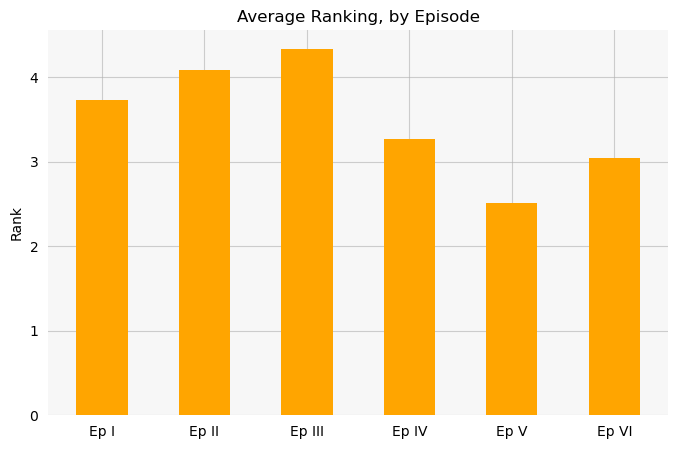

In [14]:
labels = list(agg_mean.keys())
values = list(agg_mean.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, align='center', color='orange', zorder=2, width=0.5)
plt.xticks(labels, ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'])
plt.ylabel('Rank')
plt.title('Average Ranking, by Episode')
plt.gca().set_facecolor('#f7f7f7')
plt.grid(alpha=0.6, zorder=3)
plt.tick_params(left=False, bottom=False)
for i in ['left', 'bottom', 'top', 'right']:
    plt.gca().spines[i].set_visible(False)

plt.show()

The plot shows that, on average, Episode V was thought as the best among all six. One of the reasons could be that it was the first Star Wars movie ever made, hence its impact on the public. It is followed by Ep. VI, Ep. IV, Ep. I, Ep. II and Ep. III, respectively.

An interesting fact is that even though technology for movie FX and visual effects has improved over the years, the first trilogy has a better ranking for fans.

In addition, for the newer, first trilogy (Ep. I-III) the graph shows how every episode has been getting worse as it came out, according to fans opinion.

However, all these conclusions are the result of people who voted. In order to see how reliable the ranking is, we need to know how many people voted for each episode. Let's find that out.

In [15]:
star_wars.loc[:, ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
...,...,...,...,...,...,...
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True


In [16]:
views = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
num_seen = {}

for v in views:
    num_seen[v] = star_wars[v].sum()
    
num_seen

{'seen_1': 673,
 'seen_2': 571,
 'seen_3': 550,
 'seen_4': 607,
 'seen_5': 758,
 'seen_6': 738}

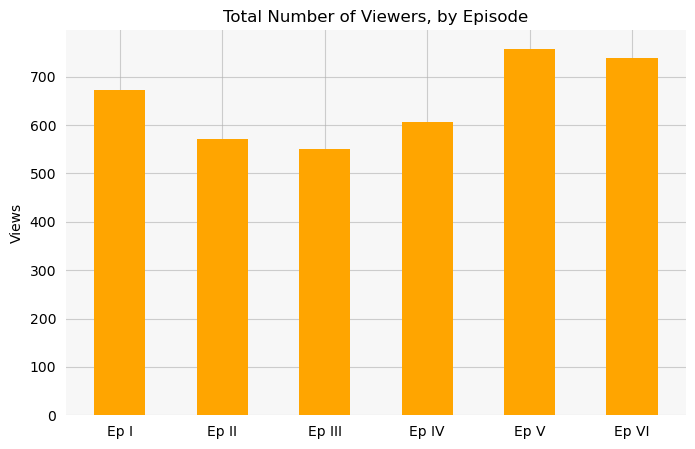

In [17]:
labels = list(num_seen.keys())
values = list(num_seen.values())

plt.figure(figsize=(8, 5))
plt.bar(labels, values, align='center', color='orange', zorder=2, width=0.5)
plt.xticks(labels, ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI'])
plt.ylabel('Views')
plt.title('Total Number of Viewers, by Episode')
plt.grid(alpha=0.6, zorder=3)
plt.gca().set_facecolor('#f7f7f7')
plt.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    plt.gca().spines[i].set_visible(False)

plt.show()

We could say the conclusions got from the previous graph that showed ranking were pretty accurate.

The best episode (Ep. V) has the highest number of viewers (who ranked it in the survey), along with the two other episodes inside the older, second trilogy.

The previous analysis concerned the survey population as a whole. However, it would be interesting to split the analysis by certain segments, such as:

- People who consider themselves Star Wars fans and people who don't.
- People who consider themselves Star Trek fans and people who don't.
- Gender, female or male.

Let's repeat the same analysis for these new segments.

## Star Wars Fans

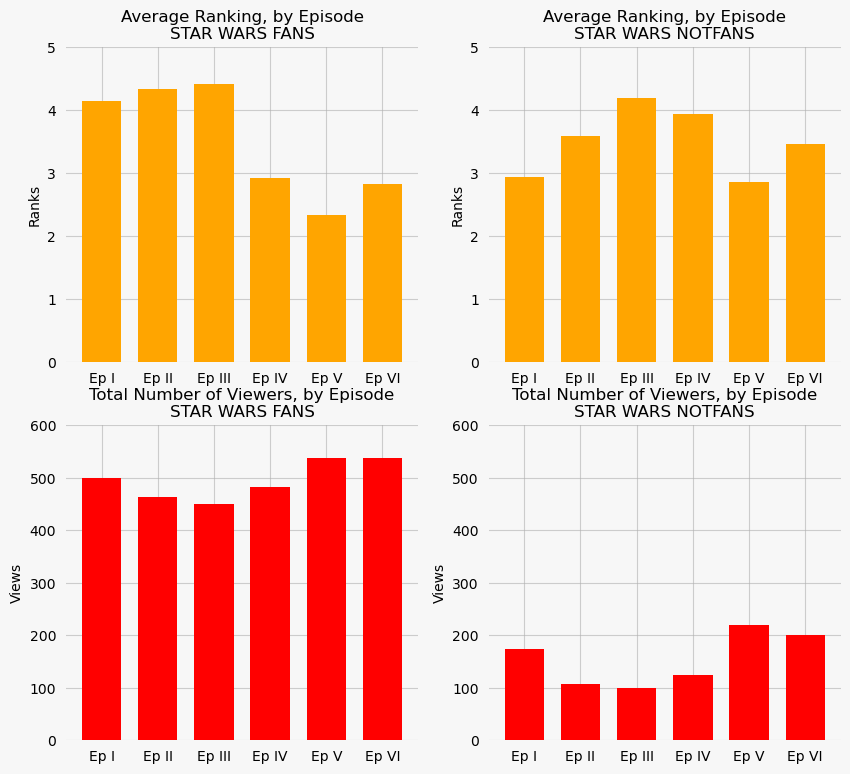

In [25]:
#Star Wars fans
sw_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
sw_notfans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

ep = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']

#Plots

fig = plt.figure(figsize=(10, 9), facecolor='#f7f7f7')
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

##Star Wars fans avg
ax1.bar(ep, sw_fans[cols].mean(), align='center', color='orange', zorder=2, width=0.7)
ax1.set_ylabel('Ranks')
ax1.set_title('Average Ranking, by Episode\nSTAR WARS FANS')
ax1.grid(alpha=0.6, zorder=3)
ax1.set_facecolor('#f7f7f7')
ax1.set_ylim(0, 5)
ax1.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax1.spines[i].set_visible(False)
    
##Star Wars notfans avg
ax2.bar(ep, sw_notfans[cols].mean(), align='center', color='orange', zorder=2, width=0.7)
ax2.set_ylabel('Ranks')
ax2.set_title('Average Ranking, by Episode\nSTAR WARS NOTFANS')
ax2.grid(alpha=0.6, zorder=3)
ax2.set_ylim(0, 5)
ax2.set_facecolor('#f7f7f7')
ax2.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax2.spines[i].set_visible(False)

##Star Wars fans sumviews
ax3.bar(ep, sw_fans[views].sum(), align='center', color='red', zorder=2, width=0.7)
ax3.set_ylabel('Views')
ax3.set_title('Total Number of Viewers, by Episode\nSTAR WARS FANS')
ax3.grid(alpha=0.6, zorder=3)
ax3.set_facecolor('#f7f7f7')
ax3.set_ylim(0, 600)
ax3.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax3.spines[i].set_visible(False)

##Star Wars fans sumviews
ax4.bar(ep, sw_notfans[views].sum(), align='center', color='red', zorder=2, width=0.7)
ax4.set_ylabel('Views')
ax4.set_title('Total Number of Viewers, by Episode\nSTAR WARS NOTFANS')
ax4.grid(alpha=0.6, zorder=3)
ax4.set_facecolor('#f7f7f7')
ax4.set_ylim(0, 600)
ax4.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax4.spines[i].set_visible(False)

plt.show()


## Star Trek Fans

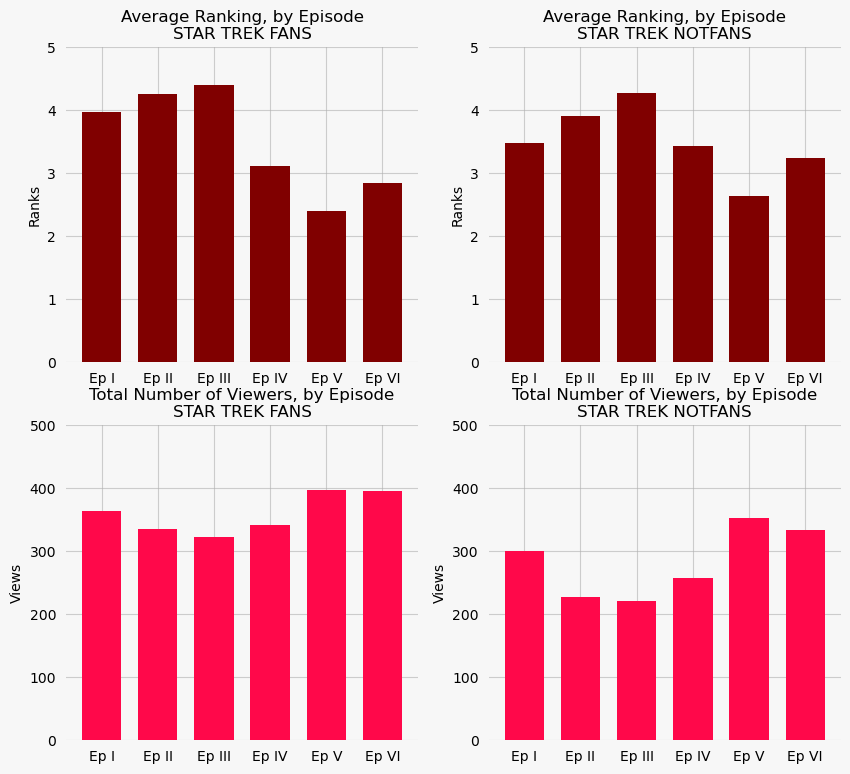

In [30]:
#Star Trek fans
st_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'Yes']
st_notfans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == 'No']

ep = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']

#Plots

fig = plt.figure(figsize=(10, 9), facecolor='#f7f7f7')
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

##Star Wars fans avg
ax1.bar(ep, st_fans[cols].mean(), align='center', color='#800000', zorder=2, width=0.7)
ax1.set_ylabel('Ranks')
ax1.set_title('Average Ranking, by Episode\nSTAR TREK FANS')
ax1.grid(alpha=0.6, zorder=3)
ax1.set_facecolor('#f7f7f7')
ax1.set_ylim(0, 5)
ax1.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax1.spines[i].set_visible(False)
    
##Star Wars notfans avg
ax2.bar(ep, st_notfans[cols].mean(), align='center', color='#800000', zorder=2, width=0.7)
ax2.set_ylabel('Ranks')
ax2.set_title('Average Ranking, by Episode\nSTAR TREK NOTFANS')
ax2.grid(alpha=0.6, zorder=3)
ax2.set_ylim(0, 5)
ax2.set_facecolor('#f7f7f7')
ax2.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax2.spines[i].set_visible(False)

##Star Wars fans sumviews
ax3.bar(ep, st_fans[views].sum(), align='center', color='#ff084a', zorder=2, width=0.7)
ax3.set_ylabel('Views')
ax3.set_title('Total Number of Viewers, by Episode\nSTAR TREK FANS')
ax3.grid(alpha=0.6, zorder=3)
ax3.set_ylim(0, 500)
ax3.set_facecolor('#f7f7f7')
ax3.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax3.spines[i].set_visible(False)

##Star Wars fans sumviews
ax4.bar(ep, st_notfans[views].sum(), align='center', color='#ff084a', zorder=2, width=0.7)
ax4.set_ylabel('Views')
ax4.set_title('Total Number of Viewers, by Episode\nSTAR TREK NOTFANS')
ax4.grid(alpha=0.6, zorder=3)
ax4.set_ylim(0, 500)
ax4.set_facecolor('#f7f7f7')
ax4.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax4.spines[i].set_visible(False)

plt.show()

Looks like both Star Wars and Star Trek fans/not fans results follow a very similar pattern. A priori, this tells their respective fans/not fans think similarly about Star Wars movies.

Even though the proportion is pretty much equal for both segments in all graphs, the number of Star Wars fans that viewed the movies is higher than the number of Star Trek fans, as well as there were less people who did not consider themselves Star Wars fans that watched the episodes than those who did not consider themselves Star Trek fans. This was something to expect.

An interesting fact is that in all cases Episode V was ranked the best and was also the most viewed, confirming conclusions got from the whole survey population results. Also, while both Star Wars and Star Trek fans watched the episodes way more than those who are not fans, they liked the first trilogy less than not-fans, which doesn't happen with the second.

This shows the first trilogy is subjectively worse from the eyes of people who could be assumed to know Star Wars better, since they consider themselves fans.

## Gender

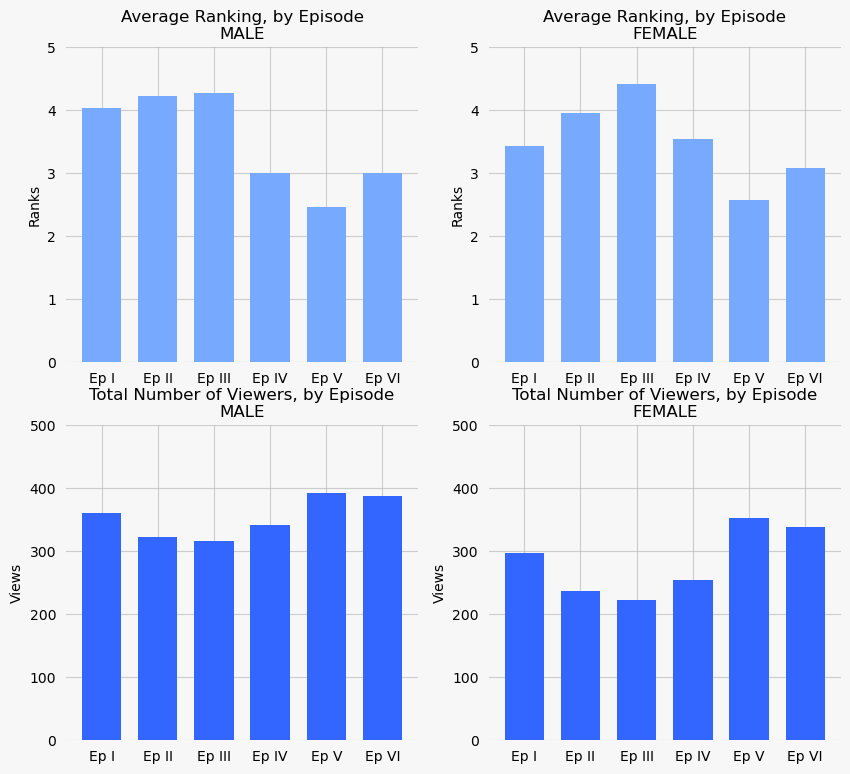

In [33]:
# Gender
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

ep = ['Ep I', 'Ep II', 'Ep III', 'Ep IV', 'Ep V', 'Ep VI']

#Plots

fig = plt.figure(figsize=(10, 9), facecolor='#f7f7f7')
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

##Star Wars fans avg
ax1.bar(ep, male[cols].mean(), align='center', color='#77aaff', zorder=2, width=0.7)
ax1.set_ylabel('Ranks')
ax1.set_title('Average Ranking, by Episode\nMALE')
ax1.grid(alpha=0.6, zorder=3)
ax1.set_facecolor('#f7f7f7')
ax1.set_ylim(0, 5)
ax1.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax1.spines[i].set_visible(False)
    
##Star Wars notfans avg
ax2.bar(ep, female[cols].mean(), align='center', color='#77aaff', zorder=2, width=0.7)
ax2.set_ylabel('Ranks')
ax2.set_title('Average Ranking, by Episode\nFEMALE')
ax2.grid(alpha=0.6, zorder=3)
ax2.set_ylim(0, 5)
ax2.set_facecolor('#f7f7f7')
ax2.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax2.spines[i].set_visible(False)

##Star Wars fans sumviews
ax3.bar(ep, male[views].sum(), align='center', color='#3366ff', zorder=2, width=0.7)
ax3.set_ylabel('Views')
ax3.set_title('Total Number of Viewers, by Episode\nMALE')
ax3.grid(alpha=0.6, zorder=3)
ax3.set_ylim(0, 500)
ax3.set_facecolor('#f7f7f7')
ax3.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax3.spines[i].set_visible(False)

##Star Wars fans sumviews
ax4.bar(ep, female[views].sum(), align='center', color='#3366ff', zorder=2, width=0.7)
ax4.set_ylabel('Views')
ax4.set_title('Total Number of Viewers, by Episode\nFEMALE')
ax4.grid(alpha=0.6, zorder=3)
ax4.set_ylim(0, 500)
ax4.set_facecolor('#f7f7f7')
ax4.tick_params(left=False, bottom=False)
for i in ['left', 'right', 'top', 'bottom']:
    ax4.spines[i].set_visible(False)

plt.show()

The gender graphs look very similar to the previous bar plots showing Star Wars/Star Trek fans contrast, again showing Episode V as the best and most viewed of all six.

It should also be pointed out that while more males watched the first trilogy they liked them less than females did.

This suggests that, for both Star Wars and Star Trek, a big part of those who consider themselves fans might be males, whereas those who don't might be to females, since the corresponding graphs look similar.

Let's find out the exact proportion.

In [72]:
#male
count_male_sw = male['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
per_male_fan_sw = count_male_sw[0]/sum(count_male_sw)*100
per_male_notfan_sw = count_male_sw[1]/sum(count_male_sw)*100
per_male_sw = [per_male_fan_sw, per_male_notfan_sw]

count_male_st = male['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()
per_male_fan_st = count_male_st[1]/sum(count_male_st)*100
per_male_notfan_st = count_male_st[0]/sum(count_male_st)*100
per_male_st = [per_male_fan_st, per_male_notfan_st]

#female
count_female_sw = female['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()
per_female_fan_sw = count_female_sw[0]/sum(count_female_sw)*100
per_female_notfan_sw = count_female_sw[1]/sum(count_female_sw)*100
per_female_sw = [per_female_fan_sw, per_female_notfan_sw]

count_female_st = female['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()
per_female_fan_st = count_female_st[1]/sum(count_female_st)*100
per_female_notfan_st = count_female_st[0]/sum(count_female_st)*100
per_female_st = [per_female_fan_st, per_female_notfan_st]

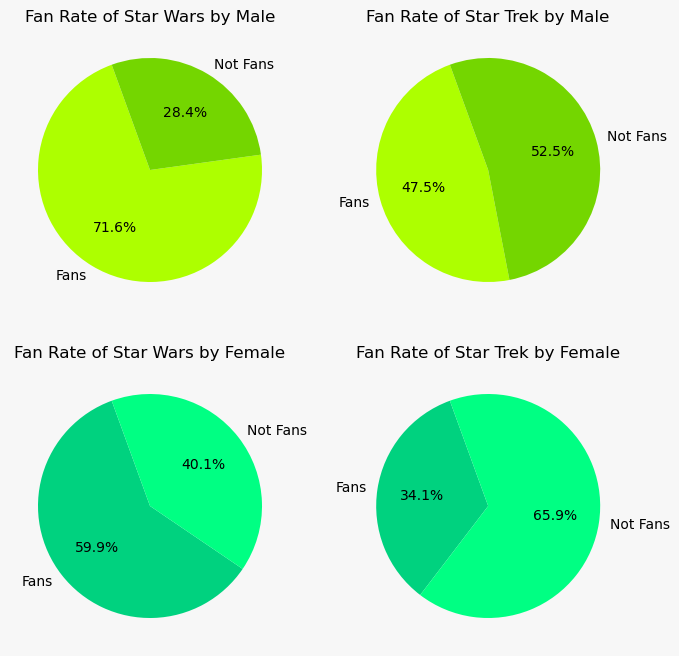

In [73]:
#plot
fig = plt.figure(figsize=(8, 8), facecolor='#f7f7f7')
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

#male fans Star Wars
ax1.pie(per_male_sw, labels=['Fans', 'Not Fans'], colors=['#adff00', '#74d600'], autopct='%1.1f%%', startangle=110)
ax1.set_title('Fan Rate of Star Wars by Male')

#male fans Star Trek
ax2.pie(per_male_st, labels=['Fans', 'Not Fans'], colors=['#adff00', '#74d600'], autopct='%1.1f%%', startangle=110)
ax2.set_title('Fan Rate of Star Trek by Male')

#female fans Star Wars
ax3.pie(per_female_sw, labels=['Fans', 'Not Fans'], colors=['#00d27f', '#00ff83'], autopct='%1.1f%%', startangle=110)
ax3.set_title('Fan Rate of Star Wars by Female')

#female fans Star Trek
ax4.pie(per_female_st, labels=['Fans', 'Not Fans'], colors=['#00d27f', '#00ff83'], autopct='%1.1f%%', startangle=110)
ax4.set_title('Fan Rate of Star Trek by Female')

plt.show()

Indeed, whoever said yes to being a fan of both franchises in the survey was most likely a male, thus the pattern showed in the previous graphs.

However, while this might suggest this conclusion, the relation between gender and being/not being a fan is not trivial. Even though most fans are males the percentages above still are very close to each other, especially in the Star Wars case, just around 10% apart.